# DBSCAN

- DBSCAN : DBSCAN have full form is Density Based Spatial Clustering Applications with noise.
- `Density` means something in some space with Area.
- `Spatial` means number of space covered by a cluster.
- `Noise` means number of spaces in a cluster, without spaces in s cluster group.

## Methods behind the DBSCAN:
- `Area of a cluster` depends on the radius of cluster and thershold value.
- `KNN` use KNN to measure the distance of cluster in DBSCAN
- `Core Points` if there are at least minimum points(MinPts) with in a distance from this point.
- `Border point` if it is reachable from a core point and there are less than MinPoints within a distance from a point.
- `Outier/Noise` a point other than normal clusters.  

### Apply the model of DBSCAN on a dataset:

**Import the libraries**

In [1]:
#Import the libraries:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Import the sklearn libraries for DBSCAN:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [5]:
#load the dataset of iris with seaborn as sns:

df = sns.load_dataset('iris')

#Print the first 5 rows of the data:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
#Make the labels of dataset:

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

#Apply the standard scaler to scale the values:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

#Create the DBSCAN object:

dbscan = DBSCAN(eps=0.5, min_samples=5)

#Fit the model:

dbscan.fit(X_scaled)

DBSCAN()

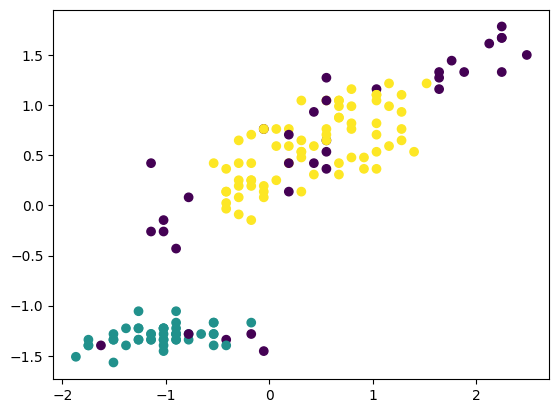

In [17]:
#Plot the scatterplot with dbscan:
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=dbscan.labels_)
#plt.title('DBSCAN Clustering')
#plt.xlabel(df.feature_names[0])
# plt.ylabel(df.feature_names[2])
plt.show()

## Hyperparameter DBSCAN

- In this method, K nearst neighbor used as the cluster identifier that how many clusters are near and form a group of similar clusters in DBSCAN.


**Import the libraries**

In [19]:
#Import the libraries:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Import the sklearn libraries for DBSCAN:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
#Import the library of knn:

from sklearn.neighbors import NearestNeighbors

***Import the dataset***

In [20]:
#load the dataset of iris with seaborn as sns:

df = sns.load_dataset('iris')

#Print the first 5 rows of the data:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Import the Elbow Method and Indicate the elbow line of dataset**

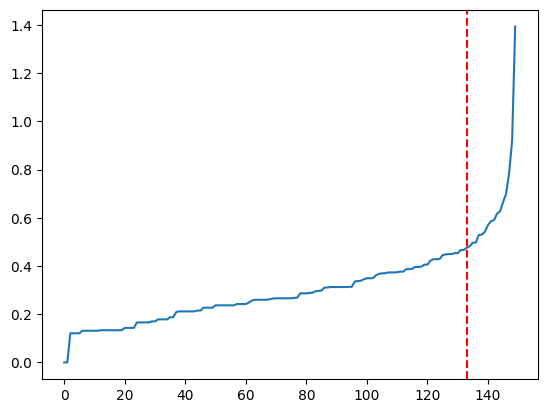

In [40]:
#Import the features:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
#Import the standard scaler:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Find the nearst neighbor:

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
#Sort the distance:
distances, indices = neighbors_fit.kneighbors(X_scaled)
#Plot the distance:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
#plt.show()
from kneed import KneeLocator
#Identify the elbow:
kneedle = KneeLocator(range(1, len(distances)+1), distances, S=1.0, curve='convex', direction='increasing') 
elbow_index = kneedle.elbow
#Plot the elbow:
plt.axvline(x=elbow_index, color='r', linestyle = '--')
plt.show()

**Distance value of Elbow Point**

In [36]:
#Elbow Distance:
print('Elbow-dis: ', distances[elbow_index])

Elbow-dis:  0.4760712736677158


## Apply the Silhouette Score Method

***Import the libraries***

In [31]:
#Import the libraries:
#Import the libraries:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Import the sklearn libraries for DBSCAN:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
#Import the library of knn:

from sklearn.neighbors import NearestNeighbors
#Import the silhouette score:
from sklearn.metrics import silhouette_score

***Load the dataset***

In [32]:
#Import the dataset:
df = sns.load_dataset('iris')
#Print the first 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Import the Silhouette Method**

In [36]:
#Import the feature of datasets:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
#Number of eps:
eps = 0.5
#Number of min_samples
MinPts_range = range(2, 11) 
#Initilize the best Minpts:
best_Minpts = -1
best_Silhouette = -float('inf')
#Loop through all the MinPts in the range
for MinPts in MinPts_range:
    dbscan = DBSCAN(eps=eps, min_samples= MinPts)
    labels = dbscan.fit_predict(X)
    #Ignore the excutation if no cluster is found:
    if len(np.unique(labels)) < 2 or (labels == -1).all:
        continue
    #Compute the silhouette score:
silhouette_avg = silhouette_score(X, labels)
    #Print the MinPts and Silhuoette score:
print(f'MinPts: {MinPts}, Silhouette Score: {silhouette_avg}')

MinPts: 10, Silhouette Score: 0.4226852735832708


***Best score of Silhouette Method***

In [39]:

    #Select the best model score:
    if silhouette_avg > best_Silhouette:
        best_Silhouette = silhouette_avg
        best_Minpts = MinPts
        #Print the values:
print(f'Best MinPts: {best_Minpts}, Best Silhouette Score: {best_Silhouette}')

Best MinPts: 10, Best Silhouette Score: 0.4226852735832708


## Gaussian Mixture Method

- Gaussian Mixture Method is used an extention of DBSCAN but does not assign clusters memberships but scores the order in which points are processed.
- This method enhance order of data collection structures and no need of fixed clusters.
- This method is also involved for more neighbor queries for more computation 

In [42]:
#Import the libraries:
#Import the libraries:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Import the sklearn libraries for DBSCAN:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
#Import the library of knn:

from sklearn.neighbors import NearestNeighbors
#Import the silhouette score:
from sklearn.metrics import silhouette_score

#Import the Gaussian Mixture:
from sklearn.mixture import GaussianMixture

#Import the blobs dataset:
from sklearn.datasets import make_blobs

In [43]:
#Generate the samples:
X, y_true = make_blobs(n_samples=100, centers=2, cluster_std=0.6, random_state=0)
#Apply the gaussian mixture model:
gmm = GaussianMixture(n_components=4)
#Fit the model:
gmm.fit(X)
#Predict the labels:
labels = gmm.predict(X)
#Print the labels:
print(labels[: 10])

[3 1 0 2 3 2 0 3 0 1]


In [44]:
#Make the parameters:
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

**Apply the model on IRIS dataset**

In [45]:
#Import the iris dataset:
df = sns.load_dataset('iris')
#Print the first 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


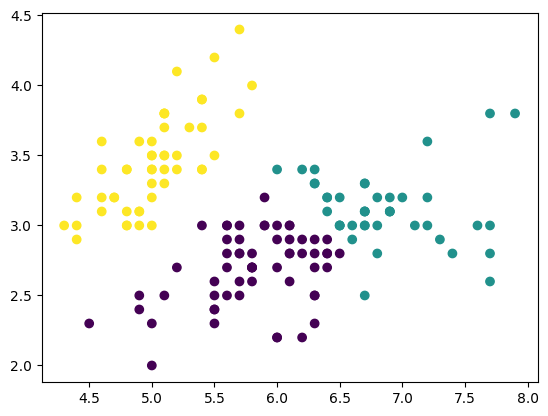

In [49]:
#Make the labels to predict the values:
X = df[['sepal_length', 'sepal_width']].values
#Apply and fit the Gaussian Mixture model:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
#label the gmm:
gmm_labels = gmm.predict(X)
#Make a scatter plot:
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.show()

**Evalution Methods**
The evaluation of the effectiveness of a system is a critical step in the development process. The evaluation methods
are given below:
1. Likelihood score Method
2. AIC and BIC

***Apply the Likelihood score method***

In [52]:
#Make the labels to predict the values:
X = df[['sepal_length', 'sepal_width']].values
#Apply and fit the Gaussian Mixture model:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
#label the gmm:
gmm_labels = gmm.predict(X)
#Make the likehood method:
gmm_likelihood = gmm.score(X)
print(gmm_likelihood)
#Make a scatter plot:
#plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
#plt.show()

-1.4978006547501475


***Apply the AIC and BIC Method***

In [53]:
#Make the labels to predict the values:
X = df[['sepal_length', 'sepal_width']].values
#Apply and fit the Gaussian Mixture model:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
#label the gmm:
gmm_labels = gmm.predict(X)
#Make the likehood method:
gmm_likelihood = gmm.score(X)
#Apply the AIC and BIC:
aic = gmm.aic(X)
bic = gmm.bic(X)
#print AIC and BIC:
print('AIC:', aic)
print('BIC:', bic)
print("Gaussian Mixture values:",gmm_likelihood)

AIC: 483.4022080861014
BIC: 534.5830080857377
Gaussian Mixture values: -1.4980073602870045
